In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [2]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score

In [3]:
test = pd.read_csv('test.csv')

In [4]:
train = pd.read_csv('train.csv')

In [5]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
train.shape

(7613, 5)

In [8]:
test.shape

(3263, 4)

In [9]:
train.keyword.unique() #Getting the Unique Keyword

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [10]:
train.keyword.unique().size 

222

In [11]:
train.keyword.mode()

0    fatalities
dtype: object

In [12]:
train.keyword.fillna(value='fatalities',inplace=True)

In [13]:
train.keyword.isnull().sum() #null items in train dataset keywords

0

In [14]:
train.isnull().sum()

id             0
keyword        0
location    2533
text           0
target         0
dtype: int64

In [15]:
# visualising text data

In [16]:
for i in range(0,100):
    print(i,train.text[i])

0 Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
1 Forest fire near La Ronge Sask. Canada
2 All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
3 13,000 people receive #wildfires evacuation orders in California 
4 Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 
5 #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires
6 #flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas
7 I'm on top of the hill and I can see a fire in the woods...
8 There's an emergency evacuation happening now in the building across the street
9 I'm afraid that the tornado is coming to our area...
10 Three people died from the heat wave so far
11 Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding
12

## We can see the impurity in the text data 
it contains hyper links and special charecters and numbers which are not helpful in the prediction thats why we have to remove them

## Removing Unwanted Char

In [17]:
import re   #Regular expression

In [18]:
train.text = train.text.str.lower()
test.text = test.text.str.lower()

In [19]:
def textcleaning(text):
#   Removing all links present in the tweets
    text = re.sub("http(s)?(://\w+)?(\.)?(\w+)?(/)?(\w+)?","",text)
#   Removing chars other than words and removing white spaces    
    text = re.sub("[^\w\s]+","",text)
#   Removing Numbers
    text = re.sub("[\d]+","",text)
#   Removing multiple spaces and replacing with single spaces
    text = re.sub("^\s+"," ",text)
#   To replace starting space
    text = re.sub("^\s","",text)
#   To replace end space
    text = re.sub("\s$","",text)
# To replace anything other than alphabets
    text = re.sub("[_]+"," ",text)
    text = re.sub("[^aA-zZ]+"," ",text)
    text = re.sub("^\s+"," ",text) #removing multiple spaces again if created
    return(text)
print(train.text[401])
textcleaning(train.text[401])

@sayn_ae angel or arson


'sayn ae angel or arson'

In [20]:
train.text = train.text.apply(textcleaning)
test.text  = test.text.apply(textcleaning)

In [21]:
train.text[345] #text is cleaned

'well done celtic fingers crossed for aberdeen tomorrow night armageddon eh'

In [22]:
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

train['text_lemmatized'] = train.text.apply(lemmatize_text)

## Countvectorizer

In [23]:
cv = CountVectorizer(tokenizer=lemmatize_text,
                       strip_accents = 'unicode',
                       stop_words = 'english')

In [24]:
train_dtm = cv.fit_transform(train.text)
test_dtm = cv.fit_transform(test.text)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [25]:
train_dtm

<7613x15272 sparse matrix of type '<class 'numpy.int64'>'
	with 64148 stored elements in Compressed Sparse Row format>

In [26]:
test_dtm

<3263x9086 sparse matrix of type '<class 'numpy.int64'>'
	with 27701 stored elements in Compressed Sparse Row format>

## Performing test train split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(train_dtm,train.target,test_size=.2,random_state=3)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(test_dtm.shape)

(6090, 15272)
(1523, 15272)
(6090,)
(1523,)
(3263, 9086)


## Using Naive Bayes

In [29]:
mnb = MultinomialNB()
mnb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [30]:
mnb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [31]:
y_pred = mnb.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [32]:
accuracy_score(y_test,y_pred)*100

79.64543663821405

In [33]:
f1_score(y_test,y_pred)*100

76.15384615384615

In [34]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[718, 123],
       [187, 495]], dtype=int64)

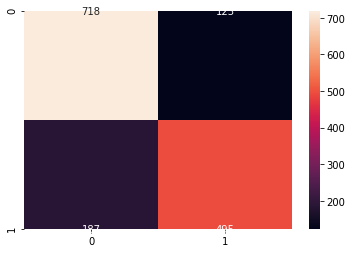

In [35]:
sns.heatmap(cm,annot=True,fmt="d")

## Tuning some Parameters for improving the Model

In [36]:
cv = CountVectorizer(stop_words= "english",ngram_range=(1,4),max_features=5000)

In [37]:
train_dtm = cv.fit_transform(train.text)
test_dtm = cv.fit_transform(test.text)

In [38]:
train_dtm

<7613x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 64853 stored elements in Compressed Sparse Row format>

In [39]:
test_dtm

<3263x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 29179 stored elements in Compressed Sparse Row format>

In [40]:
X_train,X_test,y_train,y_test = train_test_split(train_dtm,train.target,test_size=.2,random_state=3)

In [41]:
X_train.shape

(6090, 5000)

In [42]:
X_test.shape

(1523, 5000)

In [43]:
y_train.shape

(6090,)

In [44]:
y_test.shape

(1523,)

In [45]:
mnb = MultinomialNB()
mnb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [46]:
mnb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [47]:
y_pred = mnb.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [48]:
accuracy_score(y_test,y_pred)*100

79.64543663821405

In [49]:
f1_score(y_test,y_pred)*100

73.9057239057239

In [50]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[774,  67],
       [243, 439]], dtype=int64)

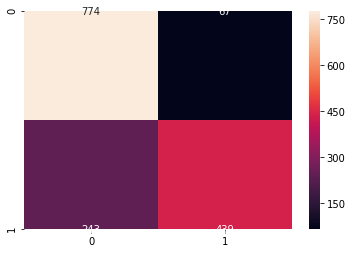

In [51]:
sns.heatmap(cm,annot=True,fmt='d')

In [53]:
submission = pd.read_csv("sample_submission.csv")

In [54]:
submission.target = mnb.predict(test_dtm)

In [55]:
submission.to_csv("submitmnb.csv",index=False)

## Using Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
lr = LogisticRegression()

In [88]:
lr.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
y_pred = lr.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [90]:
accuracy_score(y_test,y_pred)*100

80.10505581089954

In [91]:
f1_score(y_test,y_pred)*100

75.85657370517929

In [92]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[744,  97],
       [206, 476]], dtype=int64)

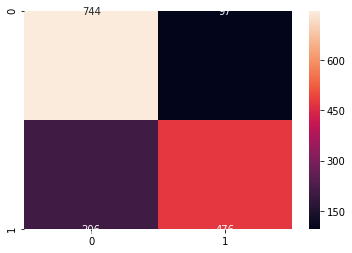

In [93]:
sns.heatmap(cm,annot=True,fmt="d")

In [94]:
submission = pd.read_csv("sample_submission.csv")

In [95]:
submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [96]:
submission.target = lr.predict(test_dtm)

In [97]:
submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [98]:
submission.to_csv("sample_submission1.csv",index=False)

In [65]:
lr = LogisticRegression()

In [66]:
param = {'C':[0.1,1,10,100],'penalty':['l1','l2'],'solver':['liblinear']}

In [67]:
from sklearn.linear_model import RidgeClassifierCV,RidgeCV, LinearRegression, LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import cross_val_score,KFold, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

In [68]:
gs = GridSearchCV(estimator=lr, param_grid=param, scoring='accuracy', cv = 5,
                 n_jobs= -1)

In [69]:
gs= gs.fit(X_train,y_train)

In [70]:
gs.best_score_

0.7955665024630542

In [71]:
gs.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [72]:
y_predgs= gs.predict(X_test)

In [73]:
accuracy_score(y_test,y_predgs)

0.788575180564675

In [83]:
submission.target = gs.predict(test_dtm)

In [85]:
submission.to_csv("submitLR.csv",index=False)

# SVM Model

In [74]:
from sklearn.svm import SVC
from sklearn import metrics

In [75]:
#'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
svc=SVC(kernel= 'linear') #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

In [76]:
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.7800393959290873


In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
param_grid = {'C':[0.1,1,10,10,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['linear']}

In [79]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [80]:
grid.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.789, total=   1.6s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.798, total=   1.7s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.788, total=   1.7s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.789, total=   1.6s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.798, total=   1.7s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.788, total=   1.7s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.789, total=   1.7s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.798, total=   1.7s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.788, total=   1.7s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] .

[CV] ...... C=1000, gamma=1, kernel=linear, score=0.704, total=   3.7s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ...... C=1000, gamma=1, kernel=linear, score=0.697, total=   5.1s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ...... C=1000, gamma=1, kernel=linear, score=0.697, total=   5.7s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] .... C=1000, gamma=0.1, kernel=linear, score=0.704, total=   3.5s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] .... C=1000, gamma=0.1, kernel=linear, score=0.697, total=   5.4s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] .... C=1000, gamma=0.1, kernel=linear, score=0.697, total=   6.1s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.704, total=   3.4s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  3.6min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 10, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [81]:
print(grid.best_params_)

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [82]:
y_pred=grid.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.7931713722915299


In [99]:
submission.target = grid.predict(test_dtm)

In [100]:
submission.to_csv("submitsvm.csv",index=False)